# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [6]:
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [3]:
print(cities)

['iwanai', 'waitangi', 'hamilton', 'crucecita', 'iqaluit', 'lompoc', 'macusani', 'port-aux-francais', 'marsh harbour', 'cabo san lucas', 'avarua', 'yellowknife', 'adamstown', 'puerto natales', 'vorgashor', 'ketchikan', 'macomer', 'coos bay', 'kondopoga', 'dudinka', 'tazovsky', 'ponte nova', 'la passe', 'tangalle', 'nemuro', 'puerto san carlos', 'mermoz boabab', 'aban', 'vilyuchinsk', 'vadso', 'aginskoye', 'caluula', 'san clemente del tuyu', 'ciudad constitucion', 'bilibino', 'salinopolis', 'fauske', 'punta arenas', 'saudarkrokur', 'hermanus', 'kulia village', 'fort st. john', 'talnakh', 'las heras', 'kailua-kona', 'anadyr', 'bethel', 'fort mcmurray', 'salekhard', 'edinburgh of the seven seas', 'laojunmiao', 'suai', 'taiohae', 'whistler', 'qaqortoq', 'tura', 'timbiqui', 'hithadhoo', 'isafjordur', 'mumbwa', 'saipan', 'contamana', 'washington', 'corner brook', 'dumka', 'longyearbyen', 'erzincan', 'ribeira grande', 'tazacorte', 'grytviken', "hayma'", 'kodiak', 'ahau', 'clarksville', 'black

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # if record_count > 1:
    #     break

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']      #UTC

        # Append the City information into city_data list
        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...{e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
    


# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iwanai
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | crucecita
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | macusani
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | marsh harbour
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | macomer
Processing Record 18 of Set 1 | coos bay
Processing Record 19 of Set 1 | kondopoga
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | ponte nova
Processing Record 23

In [8]:
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 41},
 'cod': 200,
 'coord': {'lat': -28.95, 'lon': -58.9833},
 'dt': 1722544778,
 'id': 3433715,
 'main': {'feels_like': 83.91,
          'grnd_level': 998,
          'humidity': 38,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 84.94,
          'temp_max': 84.94,
          'temp_min': 84.94},
 'name': 'Crucecita',
 'sys': {'country': 'AR', 'sunrise': 1722508752, 'sunset': 1722547508},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'gust': 37.96, 'speed': 20.87}}


In [96]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [97]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iwanai,42.9744,140.5089,27.35,74,54,2.27,JP,1722637982
1,waitangi,-43.9535,-176.5597,8.79,73,49,5.36,NZ,1722637983
2,hamilton,39.1834,-84.5333,27.82,76,40,3.58,US,1722637984
3,crucecita,-28.9500,-58.9833,30.29,30,0,8.16,AR,1722637985
4,iqaluit,63.7506,-68.5145,7.85,57,75,0.00,CA,1722637986


In [98]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [99]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iwanai,42.9744,140.5089,27.35,74,54,2.27,JP,1722637982
1,waitangi,-43.9535,-176.5597,8.79,73,49,5.36,NZ,1722637983
2,hamilton,39.1834,-84.5333,27.82,76,40,3.58,US,1722637984
3,crucecita,-28.9500,-58.9833,30.29,30,0,8.16,AR,1722637985
4,iqaluit,63.7506,-68.5145,7.85,57,75,0.00,CA,1722637986


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

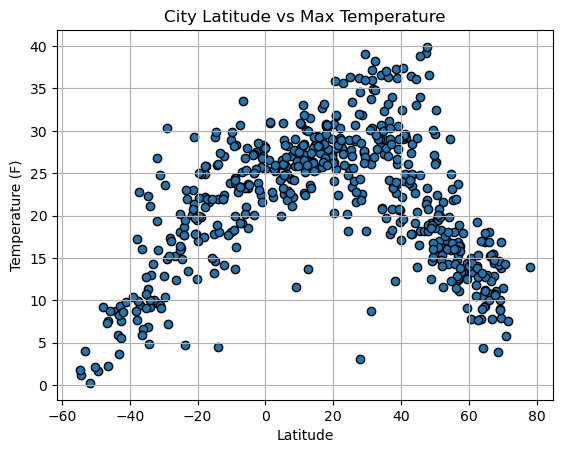

In [112]:
# Build scatter plot for latitude vs. temperature
'''
CreateScatterPlot(input_x_values=city_data_df['Lat'],
                  input_y_values=city_data_df['Max Temp'],
                  input_x_label='Latitude',
                  input_y_label='Max Temp (C)',
                  input_title='City Latitude vs Max Temperature',
                  input_image_name='Fig1.png',
                  add_line_equation=False
                  )
'''

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs Max Temperature')

# Save the figure
plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()



#### Latitude Vs. Humidity

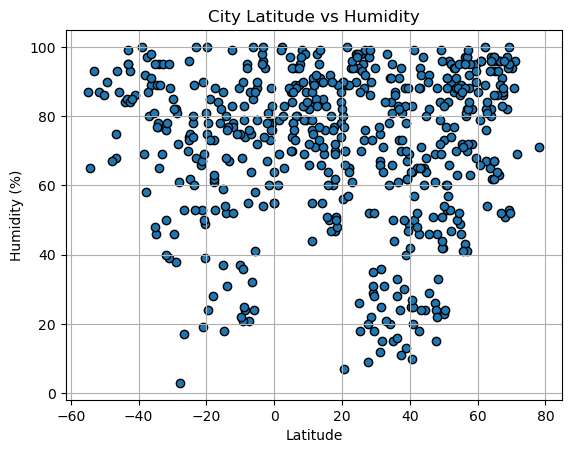

In [29]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

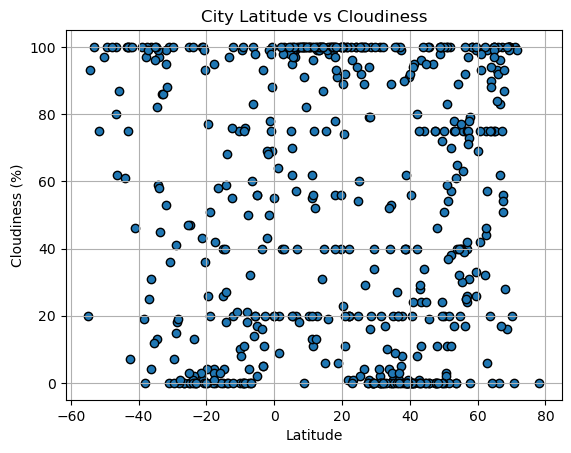

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

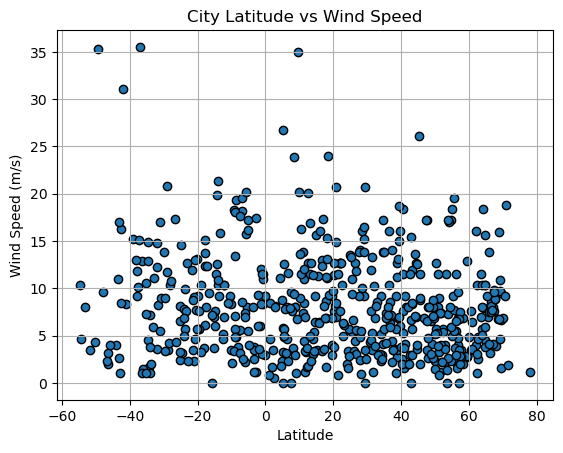

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def CalculateLinearRegression(input_x_values, input_y_values):
        
    (slope, intercept, rvalue, pvalue, stderr) = linregress(input_x_values, input_y_values)
    
    regress_values = input_x_values * slope + intercept
    
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Rturn all line regression values to dictionary that will be passed to calling function
    regr_calc = {
                 'slope':slope,
                 'intercept':intercept,
                 'rvalue':rvalue,
                 'pvalue':pvalue,
                 'stderr':stderr,
                 'regress_values':regress_values,
                 'line_eq':line_eq
                }
    
    return regr_calc

In [101]:
# Defined function to create scatter plot
def CreateScatterPlot(input_x_values, input_y_values, input_x_label, 
                      input_y_label, input_title, input_image_name='', 
                      add_line_equation=False):
    
    # Incorporate the other graph properties
    plt.scatter(input_x_values, input_y_values, marker='o', edgecolors='black')
    plt.grid(True)
    plt.xlabel(input_x_label)
    plt.ylabel(input_y_label)
    plt.title(input_title)
    
    min_x = input_x_values.min()
    min_y = input_y_values.min()
    
    
    if (add_line_equation == True):
        line_regress_values = CalculateLinearRegression(input_x_values, input_y_values)
        
        # Plot regression line
        plt.plot(input_x_values, line_regress_values['regress_values'], 'r-')
        plt.annotate(line_regress_values['line_eq'], (min_x, min_y), fontsize=15, color='red')
    
    # Only save if image name provided
    if (input_image_name != ''):
        # Save the figure
        plt.savefig(f"output_data/{input_image_name}")

    # Show plot
    plt.show()
    
    if (add_line_equation == True):
        return line_regress_values
    else:
        return None
    

In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iwanai,42.9744,140.5089,27.35,74,54,2.27,JP,1722637982
2,hamilton,39.1834,-84.5333,27.82,76,40,3.58,US,1722637984
4,iqaluit,63.7506,-68.5145,7.85,57,75,0.00,CA,1722637986
5,lompoc,34.6391,-120.4579,28.10,46,0,4.90,US,1722637988
8,marsh harbour,26.5412,-77.0636,28.76,78,78,7.77,BS,1722637991


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,8.79,73,49,5.36,NZ,1722637983
3,crucecita,-28.9500,-58.9833,30.29,30,0,8.16,AR,1722637985
6,macusani,-14.0833,-70.4333,4.50,65,35,2.84,PE,1722637989
7,port-aux-francais,-49.3500,70.2167,1.60,73,75,12.55,TF,1722637990
10,avarua,-21.2078,-159.7750,23.03,53,100,0.51,CK,1722637993


###  Temperature vs. Latitude Linear Regression Plot

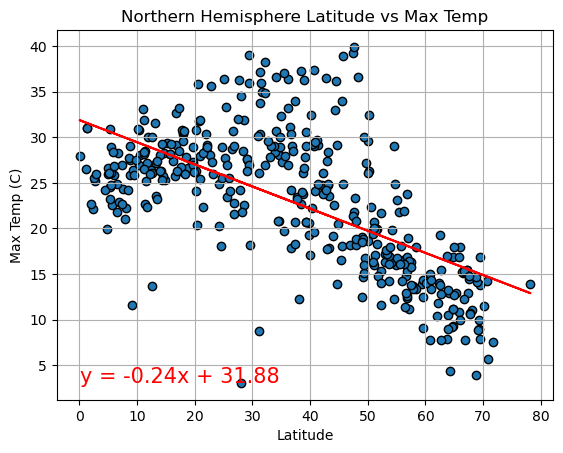

r^2 value: 0.4019068184384569


In [113]:
regress = CreateScatterPlot(input_x_values=northern_hemi_df['Lat'],
                  input_y_values=northern_hemi_df['Max Temp'],
                  input_x_label='Latitude',
                  input_y_label='Max Temp (C)',
                  input_title='Northern Hemisphere Latitude vs Max Temp',
                  input_image_name='Fig5.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)


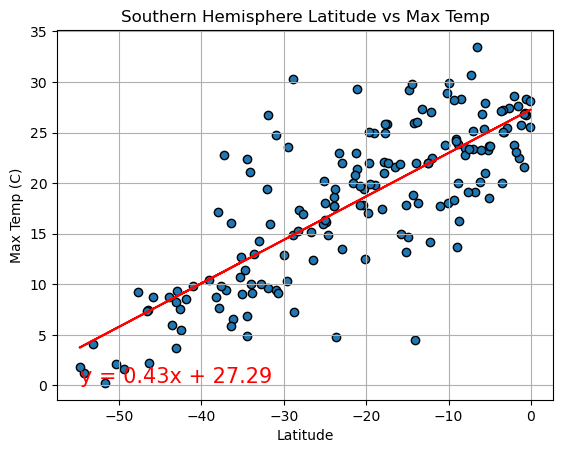

r^2 value: 0.6310189611826126


In [114]:
# Linear regression on Southern Hemisphere
regress = CreateScatterPlot(input_x_values=southern_hemi_df['Lat'],
                  input_y_values=southern_hemi_df['Max Temp'],
                  input_x_label='Latitude',
                  input_y_label='Max Temp (C)',
                  input_title='Southern Hemisphere Latitude vs Max Temp',
                  input_image_name='Fig6.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

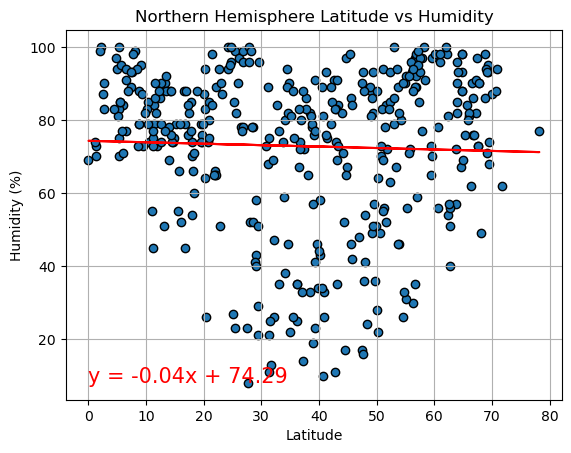

r^2 value: 0.001266399586448965


In [115]:
# Northern Hemisphere
regress = CreateScatterPlot(input_x_values=northern_hemi_df['Lat'],
                  input_y_values=northern_hemi_df['Humidity'],
                  input_x_label='Latitude',
                  input_y_label='Humidity (%)',
                  input_title='Northern Hemisphere Latitude vs Humidity',
                  input_image_name='Fig7.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

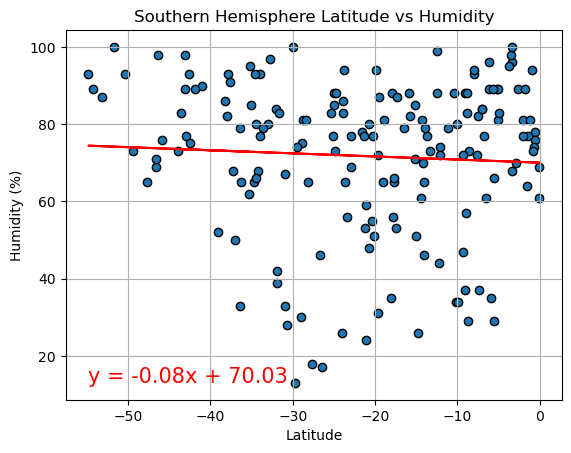

r^2 value: 0.0032058133150890456


In [118]:
# Southern Hemisphere
regress = CreateScatterPlot(input_x_values=southern_hemi_df['Lat'],
                  input_y_values=southern_hemi_df['Humidity'],
                  input_x_label='Latitude',
                  input_y_label='Humidity (%)',
                  input_title='Southern Hemisphere Latitude vs Humidity',
                  input_image_name='Fig8.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

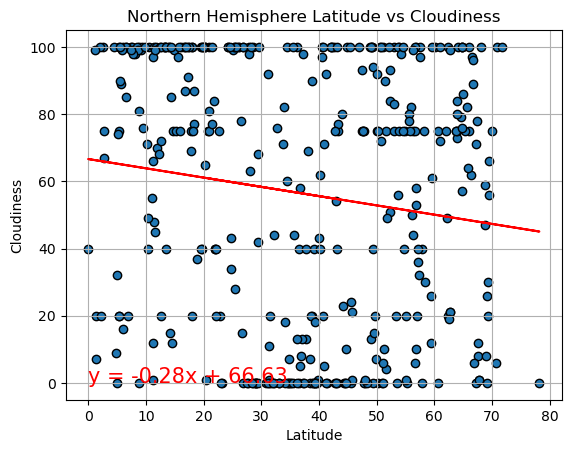

r^2 value: 0.01935995509026439


In [119]:
# Northern Hemisphere
regress = CreateScatterPlot(input_x_values=northern_hemi_df['Lat'],
                  input_y_values=northern_hemi_df['Cloudiness'],
                  input_x_label='Latitude',
                  input_y_label='Cloudiness',
                  input_title='Northern Hemisphere Latitude vs Cloudiness',
                  input_image_name='Fig9.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

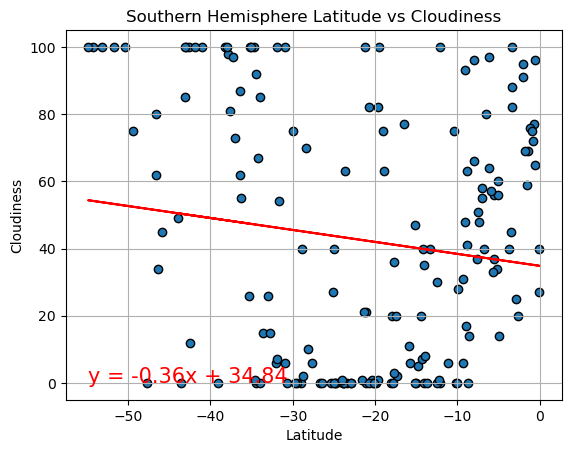

r^2 value: 0.018402714260167378


In [120]:
# Southern Hemisphere
regress = CreateScatterPlot(input_x_values=southern_hemi_df['Lat'],
                  input_y_values=southern_hemi_df['Cloudiness'],
                  input_x_label='Latitude',
                  input_y_label='Cloudiness',
                  input_title='Southern Hemisphere Latitude vs Cloudiness',
                  input_image_name='Fig10.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

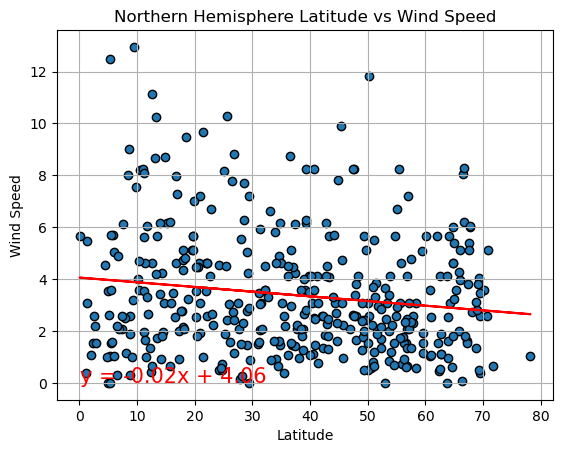

r^2 value: 0.022884750761878937


In [121]:
# Northern Hemisphere
regress = CreateScatterPlot(input_x_values=northern_hemi_df['Lat'],
                  input_y_values=northern_hemi_df['Wind Speed'],
                  input_x_label='Latitude',
                  input_y_label='Wind Speed',
                  input_title='Northern Hemisphere Latitude vs Wind Speed',
                  input_image_name='Fig11.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

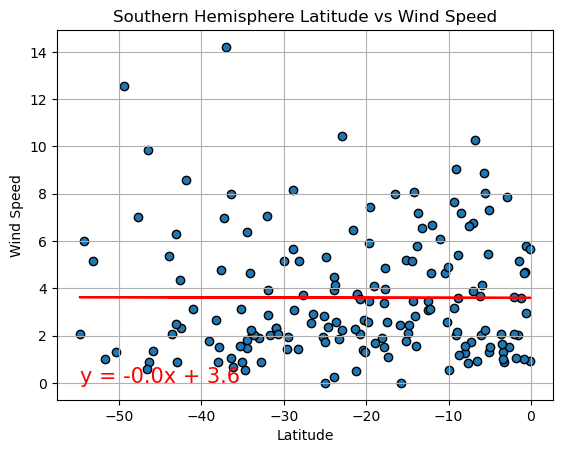

r^2 value: 5.27409118142483e-06


In [122]:
# Southern Hemisphere
regress = CreateScatterPlot(input_x_values=southern_hemi_df['Lat'],
                  input_y_values=southern_hemi_df['Wind Speed'],
                  input_x_label='Latitude',
                  input_y_label='Wind Speed',
                  input_title='Southern Hemisphere Latitude vs Wind Speed',
                  input_image_name='Fig12.png',
                  add_line_equation=True
                  )

print('r^2 value:',regress['rvalue'] **2)

**Discussion about the linear relationship:** YOUR RESPONSE HERE